In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
alexnet = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

/home/lucascogrossi/Deep-Learning-with-Pytorch/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lucascogrossi/Deep-Learning-with-Pytorch/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

In [7]:
from PIL import Image
img = Image.open("../data/ch2/cat.jpg")

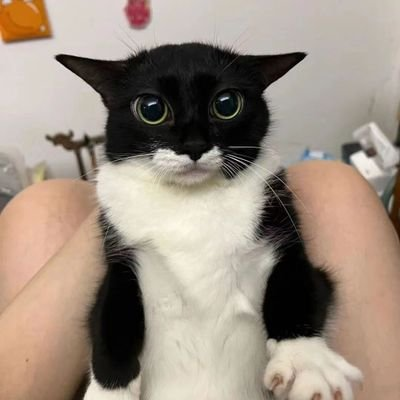

In [8]:
img

In [9]:
img_t = preprocess(img)

In [10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out = resnet(batch_t)
out

tensor([[-2.0777e+00, -8.4230e-01, -3.5937e+00, -2.1729e+00, -2.3389e+00,
          5.0498e-02, -2.2969e+00, -2.5528e+00, -2.2655e+00, -2.1181e+00,
         -1.5816e+00, -1.4015e+00, -2.9503e+00, -3.0385e+00, -2.3219e+00,
         -9.1303e-01, -2.2357e-01, -1.6960e-01,  1.8161e+00, -1.0215e+00,
         -9.1147e-01, -2.2958e+00, -2.3663e+00, -1.6399e+00, -2.8531e+00,
         -1.0171e+00, -3.8546e-01, -1.1332e+00, -1.9055e+00, -8.2699e-01,
         -2.2067e+00, -1.1954e+00, -1.3371e-01, -3.6072e+00, -2.2313e+00,
         -1.8511e+00, -7.1975e-01, -1.7328e+00,  8.5481e-01, -2.7344e+00,
         -3.0523e+00,  1.4813e+00, -1.7140e+00, -1.3601e+00, -7.6689e-01,
         -1.9824e+00, -1.5594e+00, -8.1699e-01, -4.0973e+00, -3.5151e+00,
         -3.5581e+00, -6.7041e-01, -5.3509e-01, -3.5987e-01, -1.6532e+00,
         -2.9410e+00, -8.9422e-01, -1.5494e+00, -2.7049e+00,  9.9239e-01,
         -7.5947e-01, -2.6161e+00, -1.2324e+00, -2.2241e+00, -1.9001e+00,
         -1.5124e+00,  1.6611e+00, -1.

In [13]:
with open('../data/ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [14]:
_, index = torch.max(out, 1)

In [15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Egyptian cat', 48.88277053833008)

In [16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Egyptian cat', 48.88277053833008),
 ('tabby, tabby cat', 17.91653060913086),
 ('paper towel', 6.17219352722168),
 ('Siamese cat, Siamese', 2.0042803287506104),
 ('lynx, catamount', 1.6950116157531738)]